In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('Data.csv')
print(df.dtypes)
df.head()


timestamps    int64
cpu_usage     int64
dtype: object


,timestamps,cpu_usage
0,1490195805,59
1,1490195810,53
2,1490196110,72
3,1490196410,79
4,1490196710,57


In [ ]:
df.timestamps = pd.to_datetime(df.timestamps,unit='s')

df.head(4)

,timestamps,cpu_usage
0,2017-03-22 15:16:45,59
1,2017-03-22 15:16:50,53
2,2017-03-22 15:21:50,72
3,2017-03-22 15:26:50,79


In [ ]:
df.dtypes

timestamps    datetime64[ns]
cpu_usage              int64
dtype: object

In [ ]:
type(df.index)
print(df.shape)

(2880, 2)


In [ ]:
df.columns

Index(['timestamps', 'cpu_usage'], dtype='object')

In [ ]:
df=df['cpu_usage']
df.head()

0    59
1    53
2    72
3    79
4    57
Name: cpu_usage, dtype: int64

<h1>ADF Test </h1>

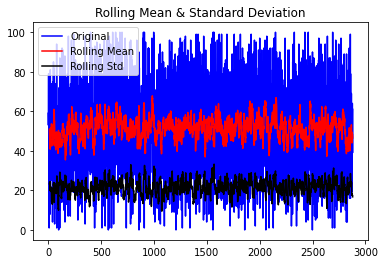

In [ ]:


from statsmodels.tsa.stattools import adfuller as adf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    

test_stationarity(df)

In [ ]:
output = (adf(df))
output

(-9.737245746677605,
 8.684006342826191e-17,
 28,
 2851,
 {'1%': -3.43264575500919,
  '10%': -2.567309945727228,
  '5%': -2.862554307267278},
 24956.409493213218)

<h3>Train Test Split </h3>


(2880,)
(0,)


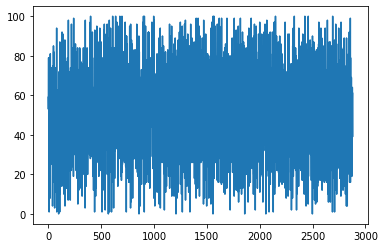

In [ ]:
train_set= df.iloc[:7000]
test_set= df.iloc[7000:]

print(train_set.shape)
print(test_set.shape)

ax = train_set.plot()
test_set.plot(ax=ax)

<h2>Applying ARIMA model on the  train set</h2> 


In [ ]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train_set, trace=True, error_action='ignore', suppress_warnings=False)
model.fit(train_set)

forecast = model.predict(n_periods=len(test_set))
forecast = pd.DataFrame(forecast,index = test_set.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train_set, label='Train')
plt.plot(test_set, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc='best')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=25682.597, Time=1.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25849.927, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25682.261, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25702.372, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31323.280, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=25680.217, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=25680.659, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25682.105, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25680.934, Time=2.79 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=25682.658, Time=1.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=26922.435, Time=0.17 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 8.522 seconds


ValueError: ignored

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.1MB/s 
     |████████████████████████████████| 9.5MB 17.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#using sarimax to account for seasonality and then forecasting
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train_set, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,m=12,D=1)
model.fit(train_set)

forecast = model.predict(n_periods=len(test_set))
forecast = pd.DataFrame(forecast,index = test_set.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train_set, label='Train')
plt.plot(test_set, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc='best')
plt.show()
